In [245]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import math
from matplotlib.colors import ListedColormap
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE
from datetime import datetime
from datetime import timedelta

import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [246]:
energy = pd.read_csv('data/energydata_complete.csv')
testing = pd.read_csv('data/testing.csv')
training = pd.read_csv('data/training.csv')

In [247]:
energy.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0  2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1  2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2  2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3  2016-01-11 17:30:00          50      40  19.89  46.066667  19.2  44.590000   
4  2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   

      T3       RH_3         T4  ...         T9   RH_9     T_out  Press_mm_hg  \
0  19.79  44.730000  19.000000  ...  17.033333  45.53  6.600000        733.5   
1  19.79  44.790000  19.000000  ...  17.066667  45.56  6.483333        733.6   
2  19.79  44.933333  18.926667  ...  17.000000  45.50  6.366667        733.7   
3  19.79  45.000000  18.890000  ...  17.000000  45.40  6.250000        733.8   
4  19.79  45.000000  18.890000  ...  17.000000  45.40  6.133333        733.9   

   RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 29 columns]

In [248]:
energy.shape

(19735, 29)

In [249]:
testing.shape

(4932, 32)

In [250]:
training.shape

(14803, 32)

In [251]:
energy.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [252]:
energy.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [253]:
energy['date'] = pd.to_datetime(energy['date'])

In [254]:
energy.dtypes

date           datetime64[ns]
Appliances              int64
lights                  int64
T1                    float64
RH_1                  float64
T2                    float64
RH_2                  float64
T3                    float64
RH_3                  float64
T4                    float64
RH_4                  float64
T5                    float64
RH_5                  float64
T6                    float64
RH_6                  float64
T7                    float64
RH_7                  float64
T8                    float64
RH_8                  float64
T9                    float64
RH_9                  float64
T_out                 float64
Press_mm_hg           float64
RH_out                float64
Windspeed             float64
Visibility            float64
Tdewpoint             float64
rv1                   float64
rv2                   float64
dtype: object

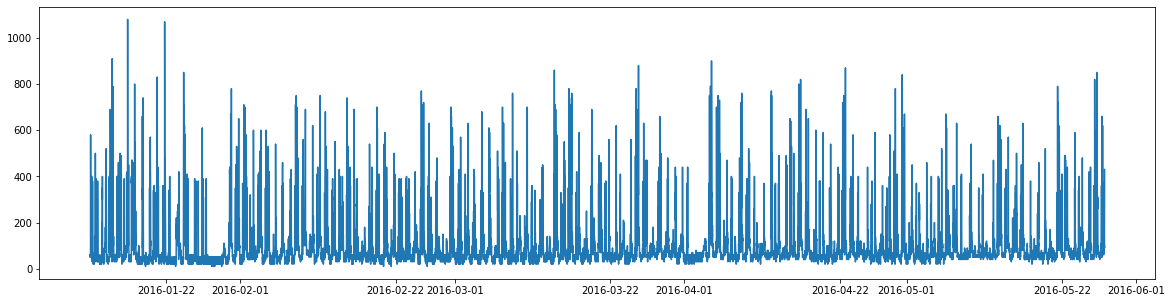

In [259]:
plt.figure(figsize = (20,5))
plt.plot(energy.date, energy.Appliances)

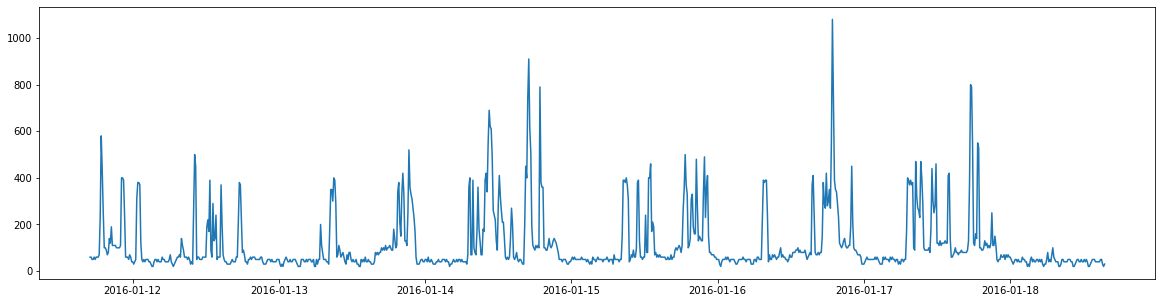

In [260]:
plt.figure(figsize = (20,5))
plt.plot(energy.date[0:1000] , energy.Appliances[0:1000])

(array([1.075e+03, 9.669e+03, 3.780e+03, 1.714e+03, 1.055e+03, 3.040e+02,
        1.640e+02, 2.000e+02, 2.430e+02, 1.760e+02, 2.240e+02, 1.960e+02,
        1.230e+02, 1.640e+02, 1.480e+02, 5.800e+01, 7.800e+01, 6.300e+01,
        3.200e+01, 3.900e+01, 3.200e+01, 2.800e+01, 4.500e+01, 2.500e+01,
        1.500e+01, 2.400e+01, 1.800e+01, 1.200e+01, 1.000e+01, 7.000e+00,
        3.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00]),
 array([  10.  ,   36.75,   63.5 ,   90.25,  117.  ,  143.75,  170.5 ,
         197.25,  224.  ,  250.75,  277.5 ,  304.25,  331.  ,  357.75,
         384.5 ,  411.25,  438.  ,  464.75,  491.5 ,  518.25,  545.  ,
         571.75,  598.5 ,  625.25,  652.  ,  678.75,  705.5 ,  732.25,
         759.  ,  785.75,  812.5 ,  839.25,  866.  ,  892.75,  919.5 ,
         946.25,  973.  ,  999.75, 1026.5 , 1053.25, 1080.  ]),
 <a list of 40 Patch objects>)

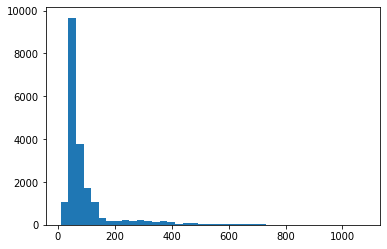

In [261]:
plt.hist(energy.Appliances, bins = 40)

{'whiskers': [<matplotlib.lines.Line2D at 0x15bea579e10>,
 'caps': [<matplotlib.lines.Line2D at 0x15bea605550>,
 'boxes': [<matplotlib.lines.Line2D at 0x15bea5799e8>],
 'medians': [<matplotlib.lines.Line2D at 0x15bea605be0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15bea605f28>],
 'means': []}

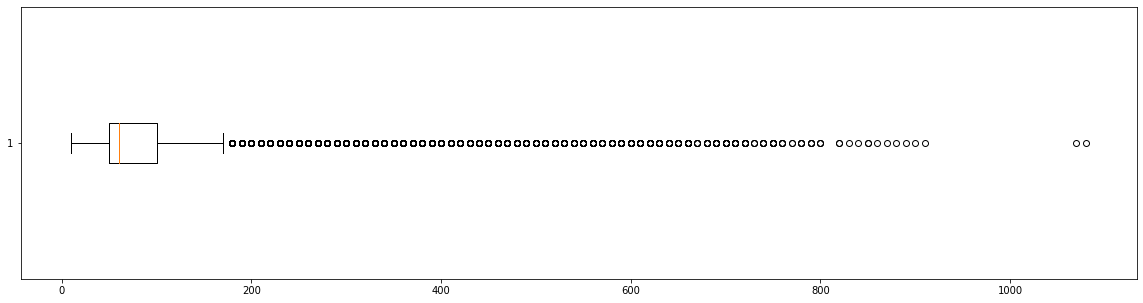

In [262]:
plt.figure(figsize = (20,5))
plt.boxplot(energy.Appliances, vert = 0)

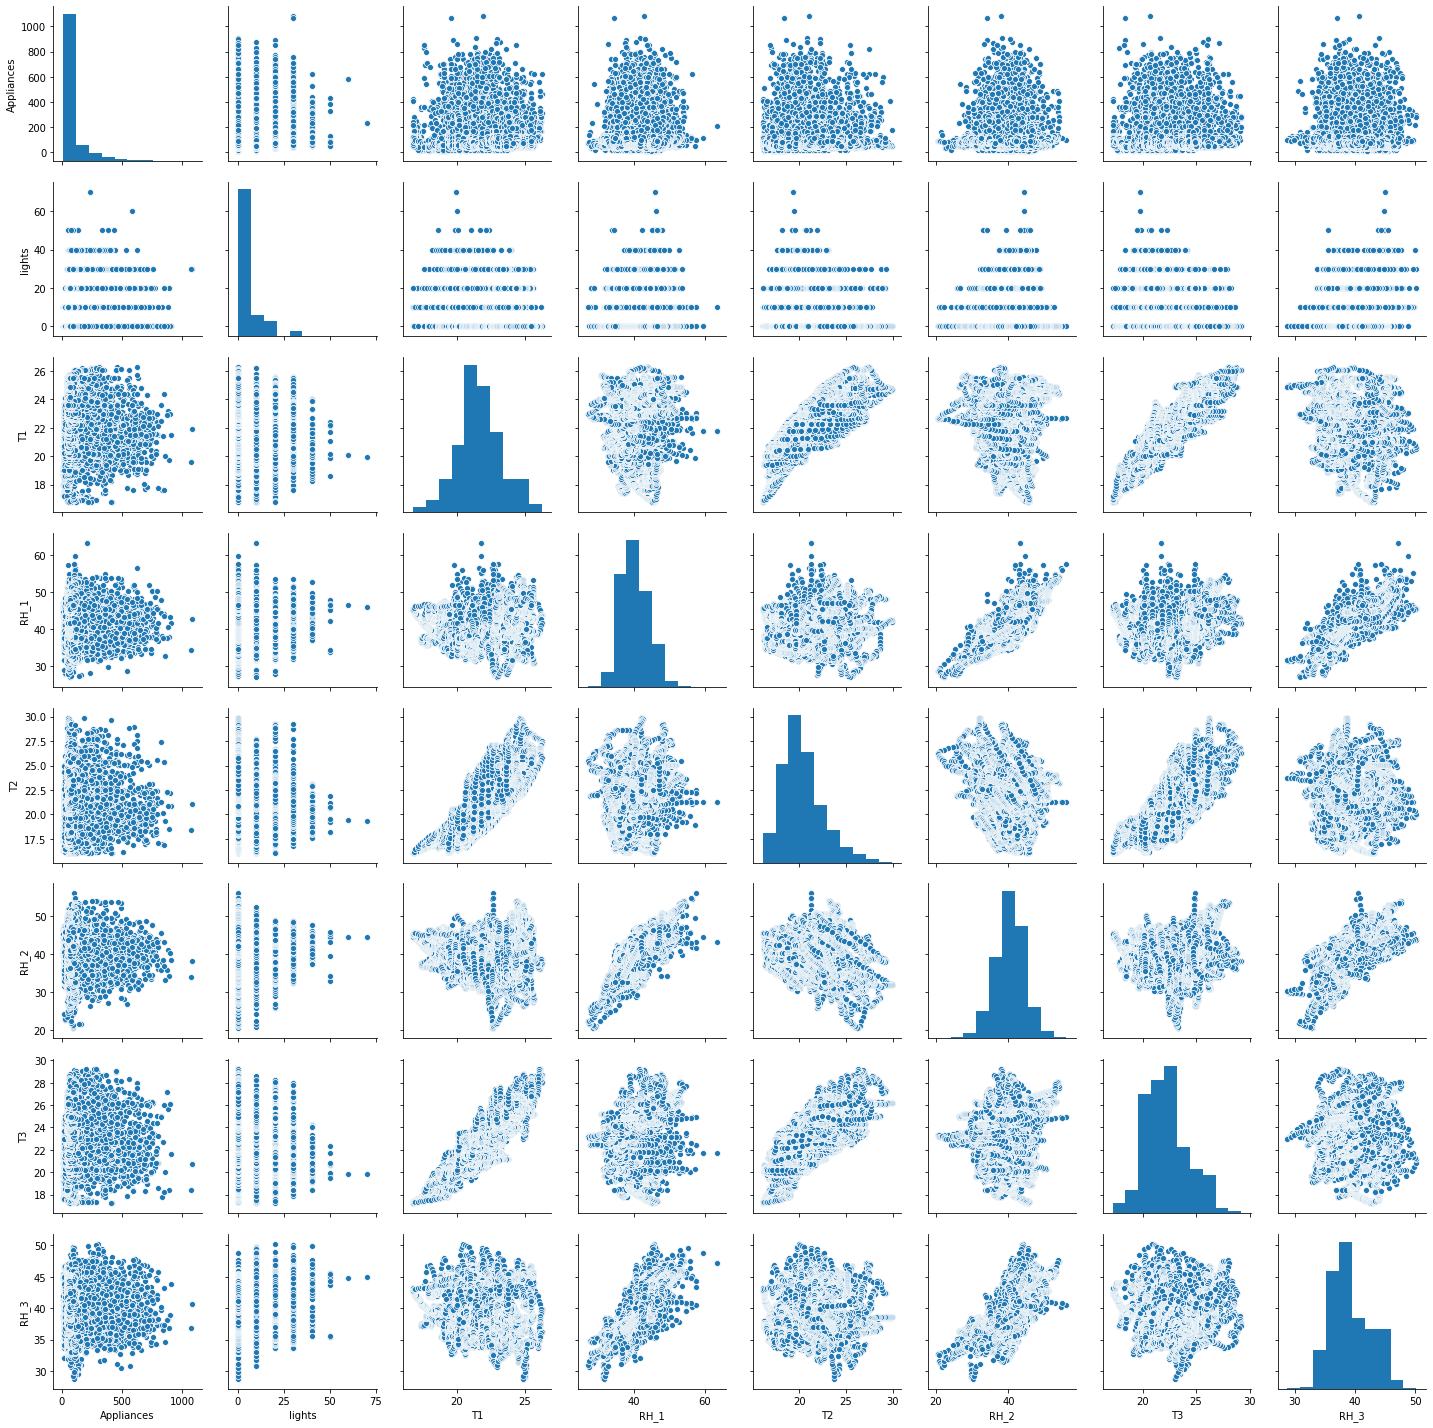

In [310]:
sns.pairplot(energy[['Appliances','lights','T1','RH_1','T2','RH_2','T3','RH_3']])

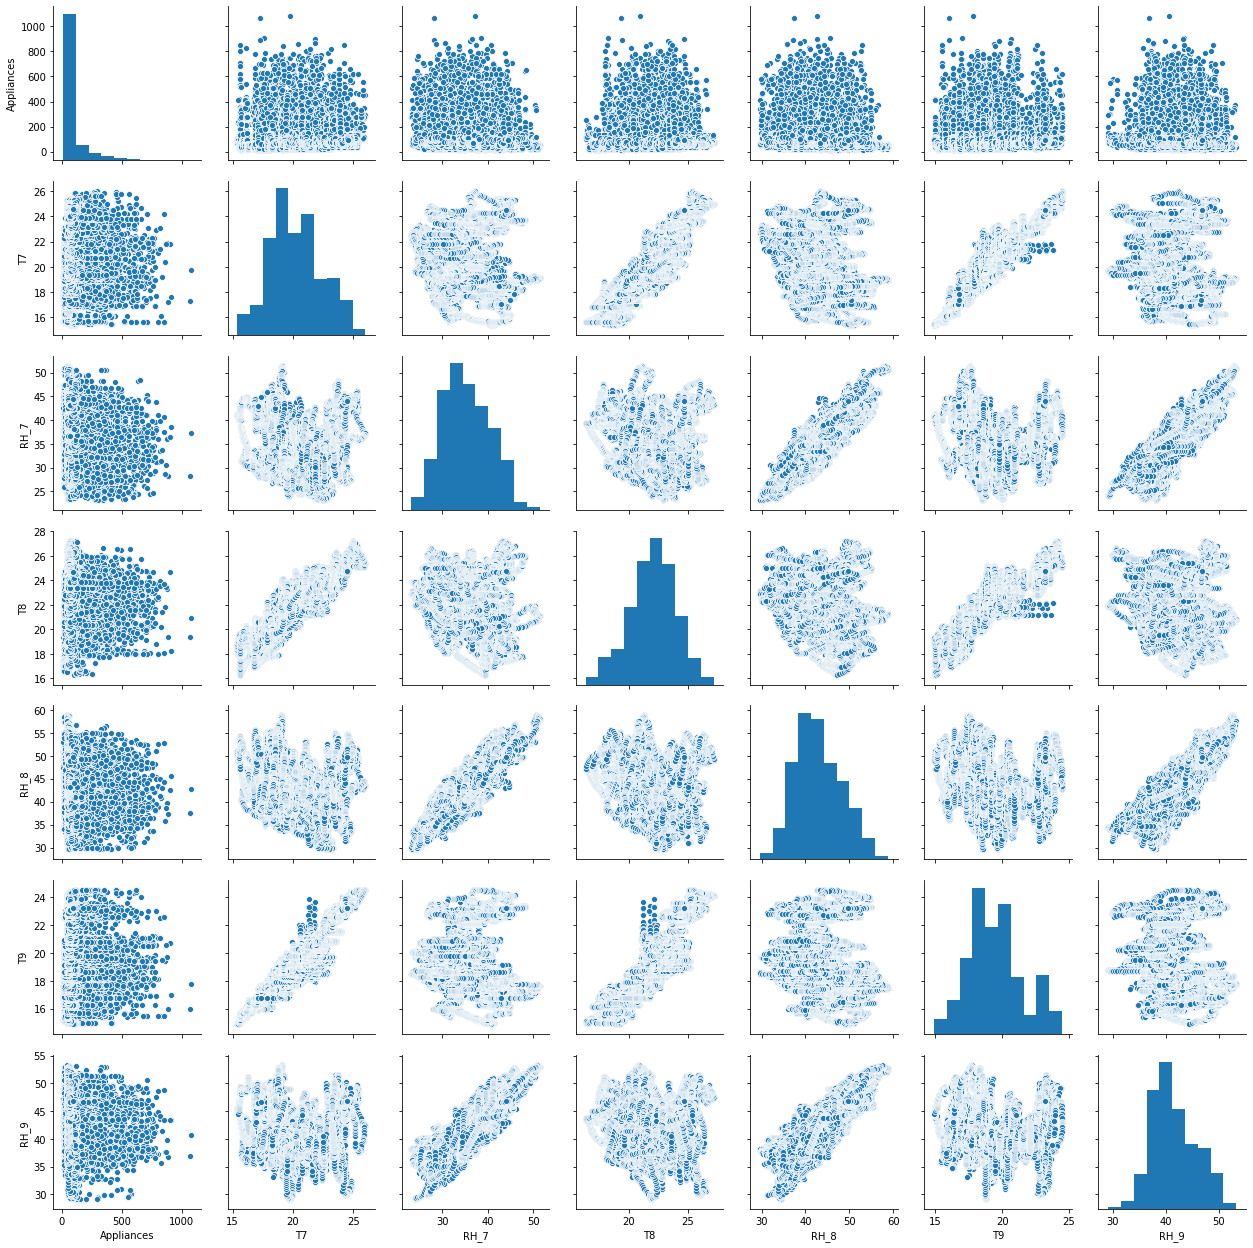

In [329]:
sns.pairplot(energy[['Appliances','T7','RH_7','T8','RH_8','T9','RH_9']])

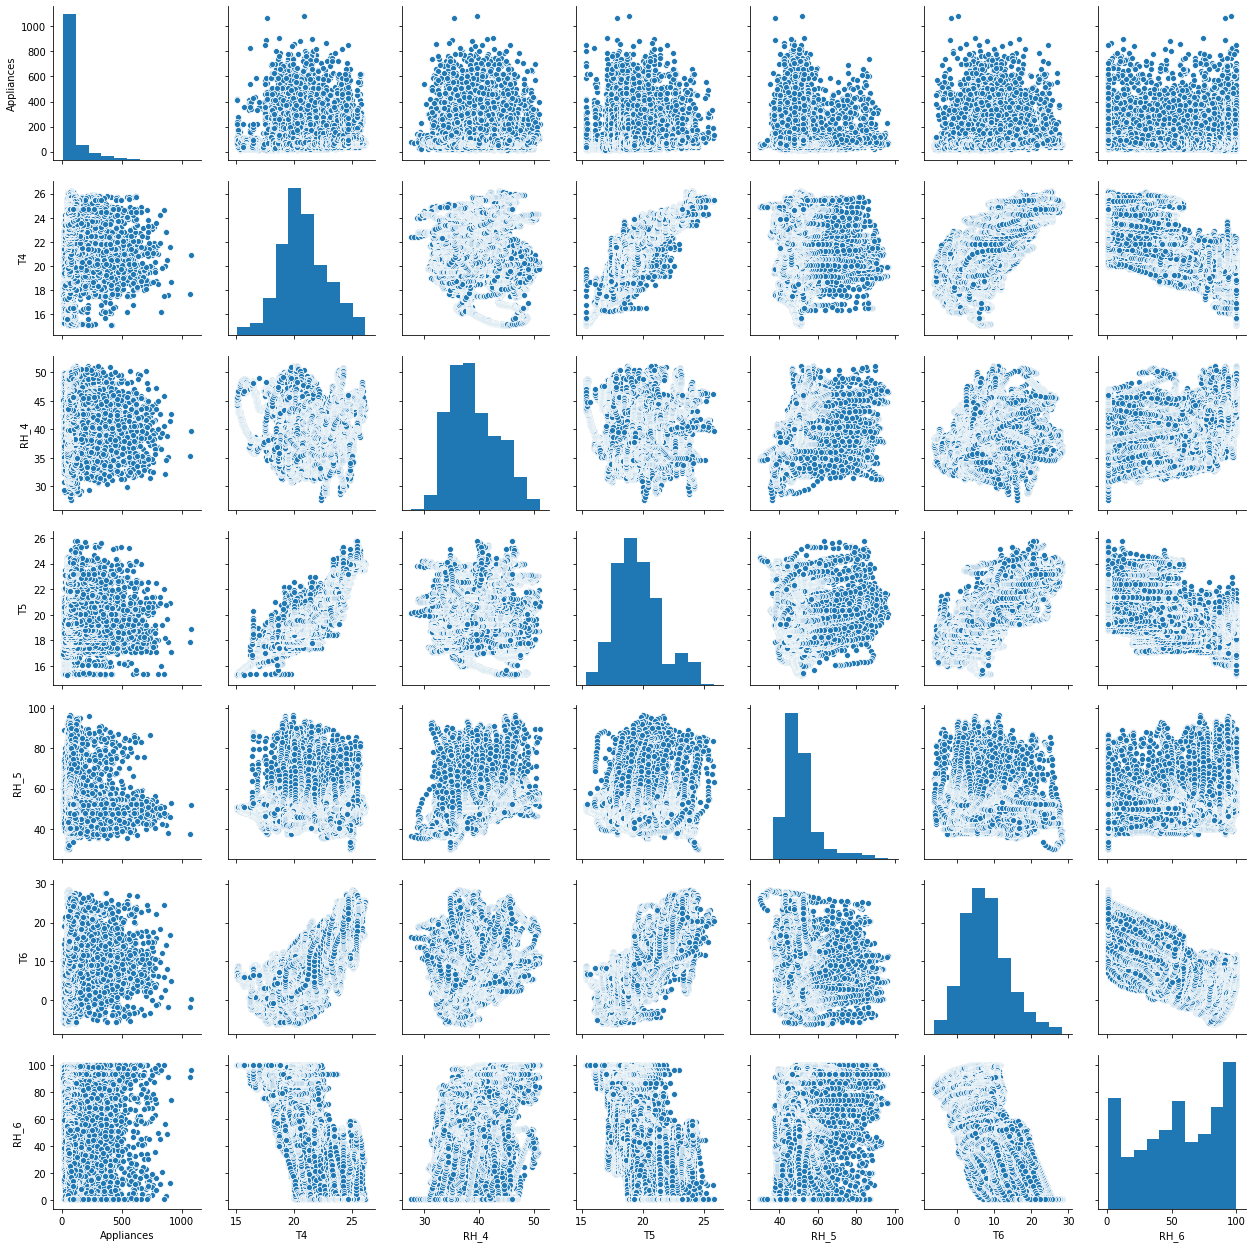

In [328]:
sns.pairplot(energy[['Appliances','T4','RH_4','T5','RH_5', 'T6','RH_6']])

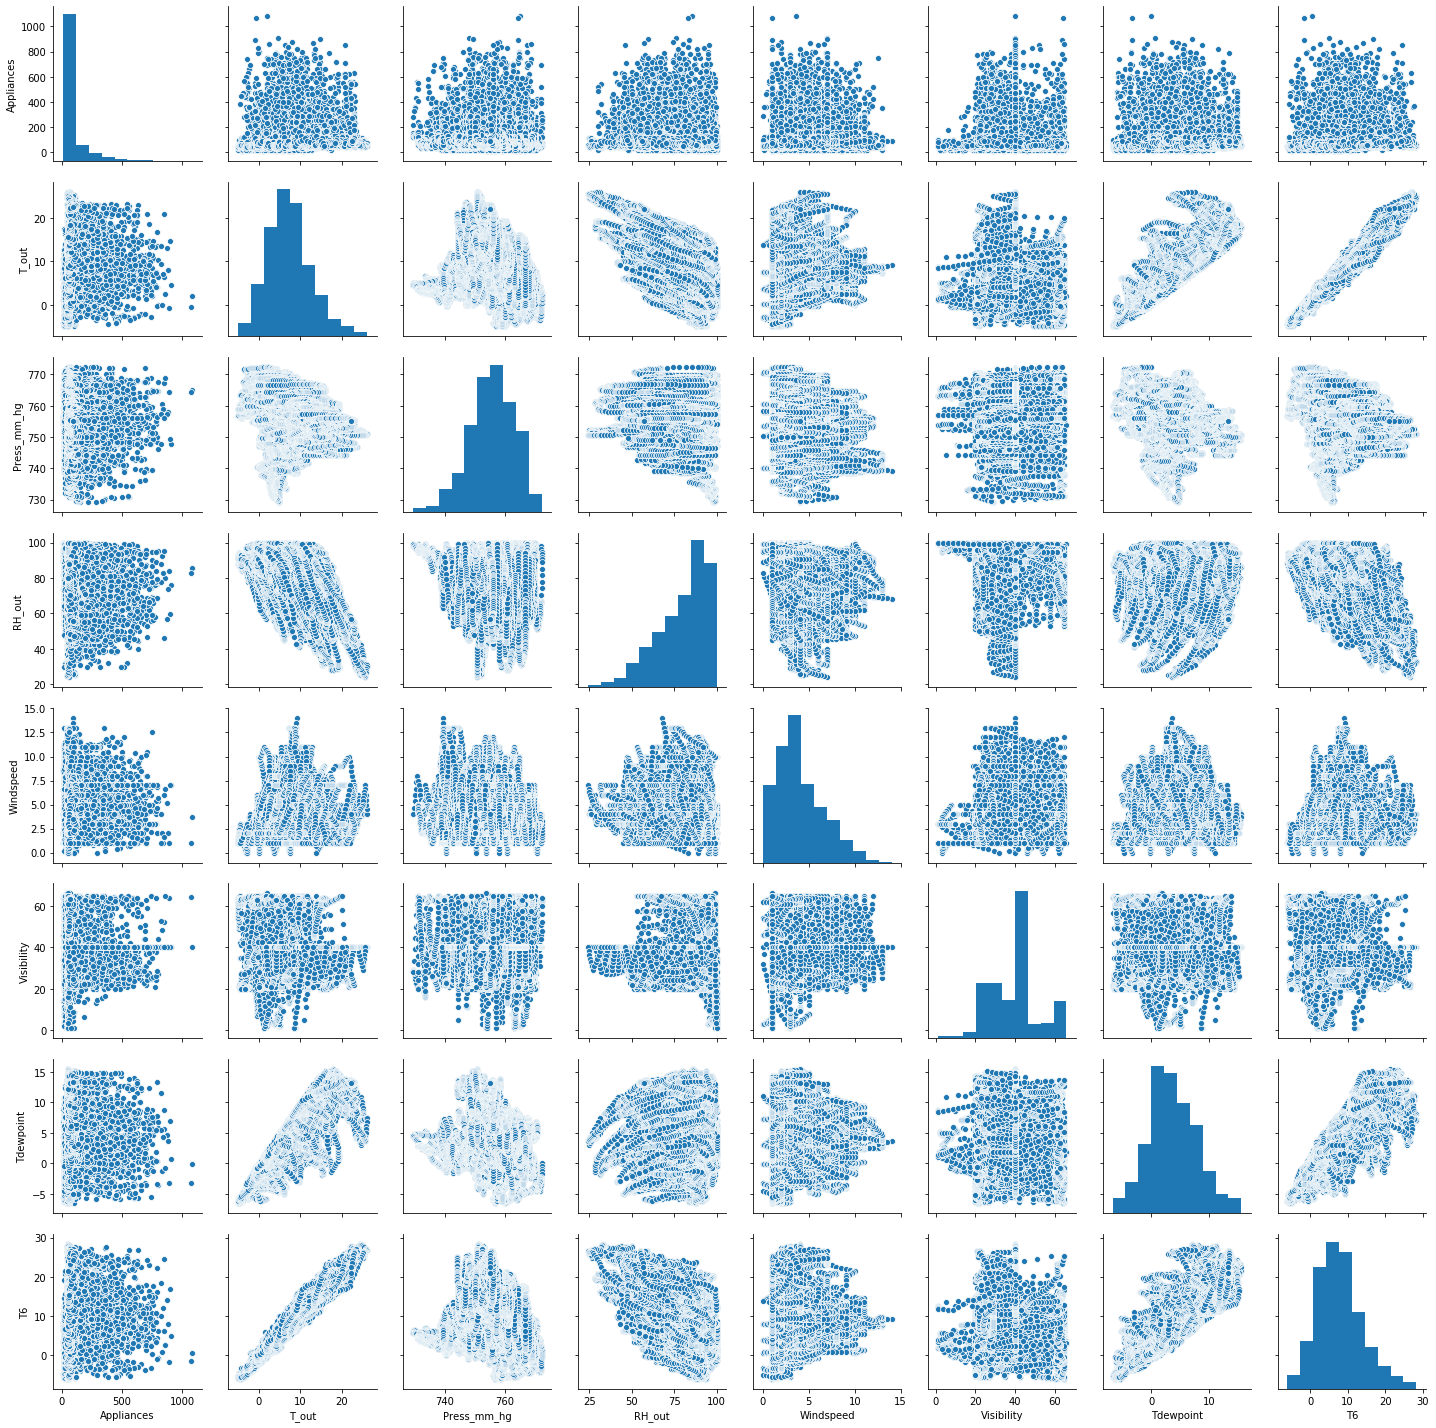

In [333]:
sns.pairplot(energy[['Appliances','T_out','Press_mm_hg','RH_out','Windspeed','Visibility','Tdewpoint','T6']])

In [263]:
corr = energy.corr()

In [264]:
corr

Appliances    lights        T1      RH_1        T2      RH_2  \
Appliances     1.000000  0.197278  0.055447  0.086031  0.120073 -0.060465   
lights         0.197278  1.000000 -0.023528  0.106968 -0.005622  0.050985   
T1             0.055447 -0.023528  1.000000  0.164006  0.836834 -0.002509   
RH_1           0.086031  0.106968  0.164006  1.000000  0.269839  0.797535   
T2             0.120073 -0.005622  0.836834  0.269839  1.000000 -0.165610   
RH_2          -0.060465  0.050985 -0.002509  0.797535 -0.165610  1.000000   
T3             0.085060 -0.097393  0.892402  0.253230  0.735245  0.137319   
RH_3           0.036292  0.131161 -0.028550  0.844677  0.121497  0.678326   
T4             0.040281 -0.008859  0.877001  0.106180  0.762066 -0.047304   
RH_4           0.016965  0.114936  0.097861  0.880359  0.231563  0.721435   
T5             0.019760 -0.078745  0.885247  0.205797  0.720550  0.110409   
RH_5           0.006955  0.141233 -0.014782  0.303258  0.029595  0.250271   
T6             0.117638 -0.079029  0.654769  0.316141  0.801186 -0.009670   
RH_6          -0.083178  0.153756 -0.615045  0.245126 -0.580372  0.389933   
T7             0.025801 -0.135347  0.838705  0.021397  0.663660 -0.051422   
RH_7          -0.055642  0.035069  0.135182  0.801122  0.229212  0.690584   
T8             0.039572 -0.071458  0.825413 -0.030053  0.578191 -0.041023   
RH_8          -0.094039  0.012915 -0.006441  0.736196  0.068534  0.679777   
T9             0.010010 -0.157592  0.844777  0.115263  0.675535  0.054544   
RH_9          -0.051462 -0.008766  0.071756  0.764001  0.157346  0.676467   
T_out          0.099155 -0.074424  0.682846  0.340767  0.792255  0.033674   
Press_mm_hg   -0.034885 -0.010576 -0.150574 -0.293957 -0.133028 -0.255646   
RH_out        -0.152282  0.068543 -0.345481  0.274126 -0.505291  0.584911   
Windspeed      0.087122  0.060281 -0.087654  0.204932  0.052495  0.069190   
Visibility     0.000230  0.020038 -0.076210 -0.021057 -0.069721 -0.005368   
Tdewpoint      0.015353 -0.036322  0.571309  0.639106  0.582602  0.499152   
rv1           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   
rv2           -0.011145  0.000521 -0.006203 -0.000699 -0.011087  0.006275   

                   T3      RH_3        T4      RH_4  ...        T9      RH_9  \
Appliances   0.085060  0.036292  0.040281  0.016965  ...  0.010010 -0.051462   
lights      -0.097393  0.131161 -0.008859  0.114936  ... -0.157592 -0.008766   
T1           0.892402 -0.028550  0.877001  0.097861  ...  0.844777  0.071756   
RH_1         0.253230  0.844677  0.106180  0.880359  ...  0.115263  0.764001   
T2           0.735245  0.121497  0.762066  0.231563  ...  0.675535  0.157346   
RH_2         0.137319  0.678326 -0.047304  0.721435  ...  0.054544  0.676467   
T3           1.000000 -0.011234  0.852778  0.122737  ...  0.901324  0.134602   
RH_3        -0.011234  1.000000 -0.140457  0.898978  ... -0.195270  0.833538   
T4           0.852778 -0.140457  1.000000 -0.048650  ...  0.889439 -0.025549   
RH_4         0.122737  0.898978 -0.048650  1.000000  ... -0.044518  0.856591   
T5           0.888169 -0.050062  0.871813  0.091812  ...  0.911055  0.072308   
RH_5        -0.066355  0.375422 -0.076489  0.352591  ... -0.138509  0.272197   
T6           0.686882  0.076833  0.652350  0.259047  ...  0.667177  0.184424   
RH_6        -0.647672  0.514912 -0.703149  0.392178  ... -0.738940  0.391943   
T7           0.847374 -0.250090  0.877763 -0.131204  ...  0.944776 -0.077690   
RH_7         0.172624  0.832685  0.043527  0.894301  ...  0.028055  0.858686   
T8           0.795283 -0.283228  0.796256 -0.167066  ...  0.869338 -0.156820   
RH_8         0.044427  0.828822 -0.095192  0.847259  ... -0.113014  0.855812   
T9           0.901324 -0.195270  0.889439 -0.044518  ...  1.000000 -0.008683   
RH_9         0.134602  0.833538 -0.025549  0.856591  ... -0.008683  1.000000   
T_out        0.699417  0.118207  0.663478  0.293289  ...  0.668220  0.223270   
Press_mm_hg -0.1899

In [265]:
month = []
hour = []
week = []
weekday = []
day = []

for i in range (len(energy)):
    month.append(energy.date[i].month_name())
    hour.append(energy.date[i])
    week.append(energy.date[i].week)
    weekday.append(energy.date[i].weekday_name)
    day.append(energy.date[i].dayofweek)

In [266]:
energy['Month']= pd.Series(month)            
energy['Hour']= pd.Series(hour).dt.floor("H")           
energy['Week']= pd.Series(week)           
energy['Weekday']= pd.Series(weekday)
energy['Day']= pd.Series(day)
energy['Time'] = energy.Hour.dt.hour

In [267]:
energy.shape

(19735, 35)

In [268]:
hour_appliances = energy.groupby('Hour',as_index=False).agg({"Appliances": "sum"})
hour_appliances.head()

Hour  Appliances
0 2016-01-11 17:00:00         330
1 2016-01-11 18:00:00        1060
2 2016-01-11 19:00:00        1040
3 2016-01-11 20:00:00         750
4 2016-01-11 21:00:00         620

In [271]:
date_time = pd.DataFrame()
date_time['Hour'] = energy['Hour']
date_time['week'] = energy['Week']
date_time['Weekday']  = energy['Weekday']
date_time['Day']  = energy['Day']
date_time['Time'] = energy['Time']
date_time.head()

Hour  week Weekday  Day  Time
0 2016-01-11 17:00:00     2  Monday    0    17
1 2016-01-11 17:00:00     2  Monday    0    17
2 2016-01-11 17:00:00     2  Monday    0    17
3 2016-01-11 17:00:00     2  Monday    0    17
4 2016-01-11 17:00:00     2  Monday    0    17

In [272]:
date_time = date_time.groupby('Hour',as_index=False).first()
date_time.head()

Hour  week Weekday  Day  Time
0 2016-01-11 17:00:00     2  Monday    0    17
1 2016-01-11 18:00:00     2  Monday    0    18
2 2016-01-11 19:00:00     2  Monday    0    19
3 2016-01-11 20:00:00     2  Monday    0    20
4 2016-01-11 21:00:00     2  Monday    0    21

In [273]:
date_appliances = pd.merge(hour_appliances,date_time)

In [274]:
date_appliances.head()

Hour  Appliances  week Weekday  Day  Time
0 2016-01-11 17:00:00         330     2  Monday    0    17
1 2016-01-11 18:00:00        1060     2  Monday    0    18
2 2016-01-11 19:00:00        1040     2  Monday    0    19
3 2016-01-11 20:00:00         750     2  Monday    0    20
4 2016-01-11 21:00:00         620     2  Monday    0    21

In [275]:
week3 = date_appliances[date_appliances.week == 3]
week3.drop(['Hour', 'week','Weekday'], axis=1)
x = week3.pivot("Time","Day","Appliances")

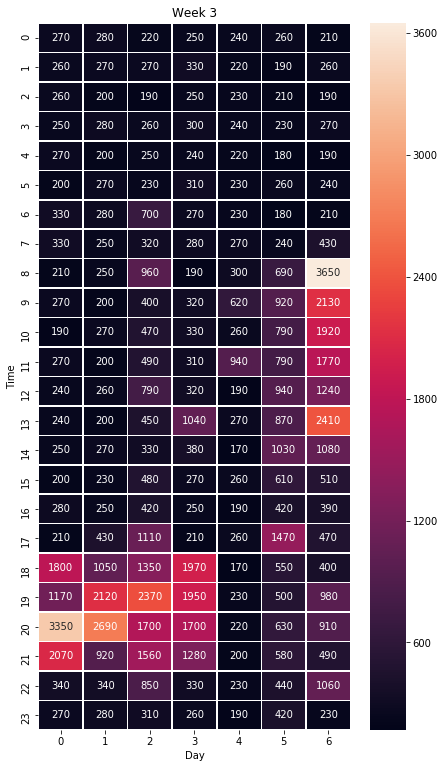

In [302]:
plt.figure(figsize=(7, 13))
plt.title("Week 3")
ax = sns.heatmap(x, linewidths=.5, annot = True, fmt = "d")

In [277]:
week4 = date_appliances[date_appliances.week == 4]
week3.drop(['Hour', 'week','Weekday'], axis=1)
y = week3.pivot("Time","Day","Appliances")

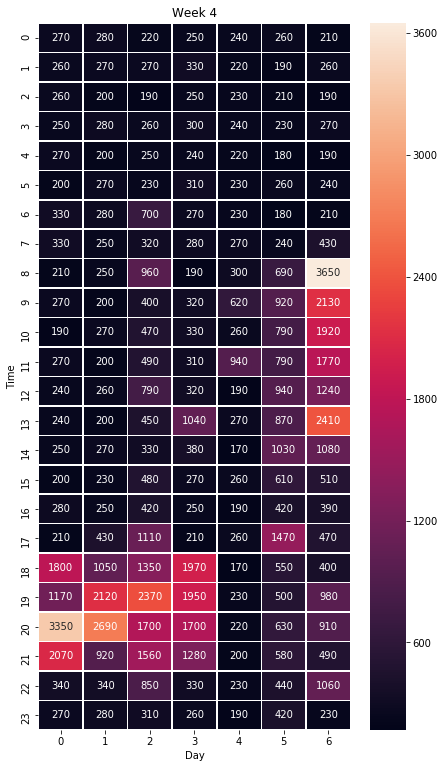

In [303]:
plt.figure(figsize=(7, 13))
plt.title("Week 4")
ax = sns.heatmap(y, linewidths=.5, annot = True, fmt = "d")

In [279]:
week5 = date_appliances[date_appliances.week == 5]
week5.drop(['Hour', 'week','Weekday'], axis=1)
z = week3.pivot("Time","Day","Appliances")

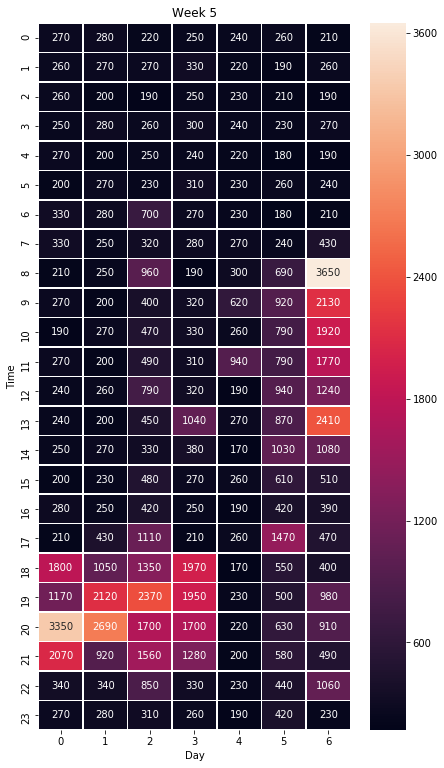

In [305]:
plt.figure(figsize=(7, 13))
plt.title("Week 5")
ax = sns.heatmap(z, linewidths=.5, annot = True, fmt = "d")

In [281]:
week6 = date_appliances[date_appliances.week == 6]
week3.drop(['Hour', 'week','Weekday'], axis=1)
i = week3.pivot("Time","Day","Appliances")

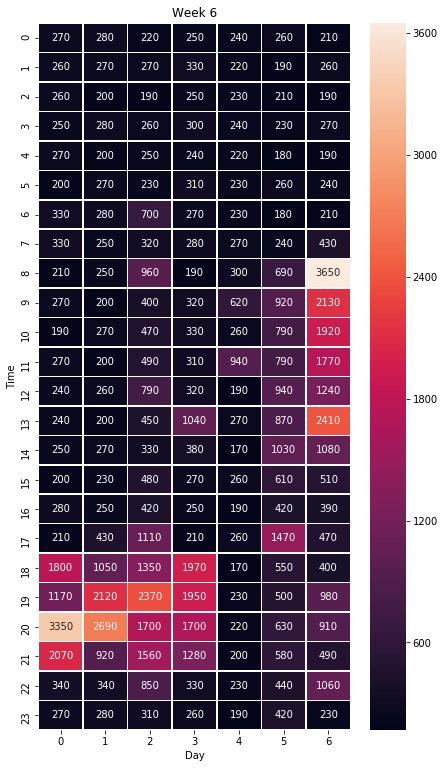

In [306]:
plt.figure(figsize=(7, 13))
plt.title("Week 6")
ax = sns.heatmap(i, linewidths=.5, annot = True, fmt = "d")

In [283]:
testing['date'] = pd.to_datetime(testing['date'])

In [284]:
training['date'] = pd.to_datetime(training['date'])

In [285]:
training.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
4 2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

      T3       RH_3         T4  ...  Press_mm_hg  RH_out  Windspeed  \
0  19.79  44.730000  19.000000  ...        733.5    92.0   7.000000   
1  19.79  44.790000  19.000000  ...        733.6    92.0   6.666667   
2  19.79  44.933333  18.926667  ...        733.7    92.0   6.333333   
3  19.79  45.000000  18.890000  ...        733.9    92.0   5.666667   
4  19.79  44.933333  18.890000  ...        734.0    92.0   5.333333   

   Visibility  Tdewpoint        rv1        rv2    NSM  WeekStatus  Day_of_week  
0   63.000000        5.3  13.275433  13.275433  61200     Weekday       Monday  
1   59.166667        5.2  18.606195  18.606195  61800     Weekday       Monday  
2   55.333333        5.1  28.642668  28.642668  62400     Weekday       Monday  
3   47.666667        4.9  10.084097  10.084097  63600     Weekday       Monday  
4   43.833333        4.8  44.919484  44.919484  64200     Weekday       Monday  

[5 rows x 32 columns]

In [286]:
pd.get_dummies(testing['Day_of_week'])

Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0          0       1         0       0         0        0          0
1          0       1         0       0         0        0          0
2          0       1         0       0         0        0          0
3          0       1         0       0         0        0          0
4          0       1         0       0         0        0          0
5          0       1         0       0         0        0          0
6          0       1         0       0         0        0          0
7          0       1         0       0         0        0          0
8          0       1         0       0         0        0          0
9          0       1         0       0         0        0          0
10         0       0         0       0         0        1          0
11         0       0         0       0         0        1          0
12         0       0         0       0         0        1          0
13         0       0         0       0         0        1          0
14         0       0         0       0         0        1          0
15         0       0         0       0         0        1          0
16         0       0         0       0         0        1          0
17         0       0         0       0         0        1          0
18         0       0         0       0         0        1          0
19         0       0         0       0         0        1          0
20         0       0         0       0         0        1          0
21         0       0         0       0         0        1          0
22         0       0         0       0         0        1          0
23         0       0         0       0         0        1          0
24         0       0         0       0         0        1          0
25         0       0         0       0         0        1          0
26         0       0         0       0         0        1          0
27         0       0         0       0         0        1          0
28         0       0         0       0         0        1          0
29         0       0         0       0         0        1          0
...      ...     ...       ...     ...       ...      ...        ...
4902       0       0         0       0         1        0          0
4903       0       0         0       0         1        0          0
4904       0       0         0       0         1        0          0
4905       0       0         0       0         1        0          0
4906       0       0         0       0         1        0          0
4907       0       0         0       0         1        0          0
4908       0       0         0       0         1        0          0
4909       0       0         0       0         1        0          0
4910       0       0         0       0         1        0          0
4911       1       0         0       0         0        0          0
4912       1       0         0       0         0        0          0
4913       1       0         0       0         0        0          0
4914       1       0         0       0         0        0          0
4915       1       0         0       0         0        0          0
4916       1       0         0       0         0        0          0
4917       1       0         0       0         0        0          0
4918       1       0         0       0         0        0          0
4919       1       0         0       0         0        0          0
4920       1       0         0       0         0        0          0
4921       1       0         0       0         0        0          0
4922       1       0         0       0         0        0          0
4923       1       0         0       0         0        0          0
4924       1       0         0       0         0        0          0
4925       1       0         0       0         0        0          0
4926       1       0         0       0         0        0          0
4927       1       0         0       0         0        0          0
4928

In [287]:
pd.get_dummies(training['Day_of_week'])

Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday
0           0       1         0       0         0        0          0
1           0       1         0       0         0        0          0
2           0       1         0       0         0        0          0
3           0       1         0       0         0        0          0
4           0       1         0       0         0        0          0
5           0       1         0       0         0        0          0
6           0       1         0       0         0        0          0
7           0       1         0       0         0        0          0
8           0       1         0       0         0        0          0
9           0       1         0       0         0        0          0
10          0       1         0       0         0        0          0
11          0       1         0       0         0        0          0
12          0       1         0       0         0        0          0
13          0       1         0       0         0        0          0
14          0       1         0       0         0        0          0
15          0       1         0       0         0        0          0
16          0       1         0       0         0        0          0
17          0       1         0       0         0        0          0
18          0       1         0       0         0        0          0
19          0       1         0       0         0        0          0
20          0       1         0       0         0        0          0
21          0       1         0       0         0        0          0
22          0       1         0       0         0        0          0
23          0       1         0       0         0        0          0
24          0       1         0       0         0        0          0
25          0       1         0       0         0        0          0
26          0       1         0       0         0        0          0
27          0       1         0       0         0        0          0
28          0       1         0       0         0        0          0
29          0       1         0       0         0        0          0
...       ...     ...       ...     ...       ...      ...        ...
14773       1       0         0       0         0        0          0
14774       1       0         0       0         0        0          0
14775       1       0         0       0         0        0          0
14776       1       0         0       0         0        0          0
14777       1       0         0       0         0        0          0
14778       1       0         0       0         0        0          0
14779       1       0         0       0         0        0          0
14780       1       0         0       0         0        0          0
14781       1       0         0       0         0        0          0
14782       1       0         0       0         0        0          0
14783       1       0         0       0         0        0          0
14784       1       0         0       0         0        0          0
14785       1       0         0       0         0        0          0
14786       1       0         0       0         0        0          0
14787       1       0         0       0         0        0          0
14788       1       0         0       0         0        0          0
14789       1       0         0       0         0        0          0
14790       1       0         0       0         0        0          0
14791       1       0         0       0         0        0          0
14792       1       0         0       0         0        0          0
14793       1       0         0       0         0        0          0
14794       1       0         0       0         0        0          0
14795       1       0         0       0         0        0          0
14796       1       0         0       0         0        0          0
14797       1       0         0       0         0        0          0
14798       1    

In [288]:
training = training.join(pd.get_dummies(training['Day_of_week']))
training.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
4 2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

      T3       RH_3         T4  ...    NSM  WeekStatus  Day_of_week  Friday  \
0  19.79  44.730000  19.000000  ...  61200     Weekday       Monday       0   
1  19.79  44.790000  19.000000  ...  61800     Weekday       Monday       0   
2  19.79  44.933333  18.926667  ...  62400     Weekday       Monday       0   
3  19.79  45.000000  18.890000  ...  63600     Weekday       Monday       0   
4  19.79  44.933333  18.890000  ...  64200     Weekday       Monday       0   

   Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
0       1         0       0         0        0          0  
1       1         0       0         0        0          0  
2       1         0       0         0        0          0  
3       1         0       0         0        0          0  
4       1         0       0         0        0          0  

[5 rows x 39 columns]

In [289]:
training = training.join(pd.get_dummies(training['WeekStatus']))
training.head()

date  Appliances  lights     T1       RH_1    T2       RH_2  \
0 2016-01-11 17:00:00          60      30  19.89  47.596667  19.2  44.790000   
1 2016-01-11 17:10:00          60      30  19.89  46.693333  19.2  44.722500   
2 2016-01-11 17:20:00          50      30  19.89  46.300000  19.2  44.626667   
3 2016-01-11 17:40:00          60      40  19.89  46.333333  19.2  44.530000   
4 2016-01-11 17:50:00          50      40  19.89  46.026667  19.2  44.500000   

      T3       RH_3         T4  ...  Day_of_week  Friday  Monday  Saturday  \
0  19.79  44.730000  19.000000  ...       Monday       0       1         0   
1  19.79  44.790000  19.000000  ...       Monday       0       1         0   
2  19.79  44.933333  18.926667  ...       Monday       0       1         0   
3  19.79  45.000000  18.890000  ...       Monday       0       1         0   
4  19.79  44.933333  18.890000  ...       Monday       0       1         0   

   Sunday  Thursday  Tuesday  Wednesday  Weekday  Weekend  
0       0         0        0          0        1        0  
1       0         0        0          0        1        0  
2       0         0        0          0        1        0  
3       0         0        0          0        1        0  
4       0         0        0          0        1        0  

[5 rows x 41 columns]

In [290]:
testing = testing.join(pd.get_dummies(testing['Day_of_week']))
testing.head()

date  Appliances  lights         T1       RH_1         T2  \
0 2016-01-11 17:30:00          50      40  19.890000  46.066667  19.200000   
1 2016-01-11 18:00:00          60      50  19.890000  45.766667  19.200000   
2 2016-01-11 18:40:00         230      70  19.926667  45.863333  19.356667   
3 2016-01-11 18:50:00         580      60  20.066667  46.396667  19.426667   
4 2016-01-11 19:30:00         100      10  20.566667  53.893333  20.033333   

        RH_2     T3       RH_3     T4  ...    NSM  WeekStatus  Day_of_week  \
0  44.590000  19.79  45.000000  18.89  ...  63000     Weekday       Monday   
1  44.500000  19.79  44.900000  18.89  ...  64800     Weekday       Monday   
2  44.400000  19.79  44.900000  18.89  ...  67200     Weekday       Monday   
3  44.400000  19.79  44.826667  19.00  ...  67800     Weekday       Monday   
4  46.756667  20.10  48.466667  19.00  ...  70200     Weekday       Monday   

   Friday  Monday  Saturday  Sunday  Thursday  Tuesday  Wednesday  
0       0       1         0       0         0        0          0  
1       0       1         0       0         0        0          0  
2       0       1         0       0         0        0          0  
3       0       1         0       0         0        0          0  
4       0       1         0       0         0        0          0  

[5 rows x 39 columns]

In [291]:
testing = testing.join(pd.get_dummies(testing['WeekStatus']))
testing.head()

date  Appliances  lights         T1       RH_1         T2  \
0 2016-01-11 17:30:00          50      40  19.890000  46.066667  19.200000   
1 2016-01-11 18:00:00          60      50  19.890000  45.766667  19.200000   
2 2016-01-11 18:40:00         230      70  19.926667  45.863333  19.356667   
3 2016-01-11 18:50:00         580      60  20.066667  46.396667  19.426667   
4 2016-01-11 19:30:00         100      10  20.566667  53.893333  20.033333   

        RH_2     T3       RH_3     T4  ...  Day_of_week  Friday  Monday  \
0  44.590000  19.79  45.000000  18.89  ...       Monday       0       1   
1  44.500000  19.79  44.900000  18.89  ...       Monday       0       1   
2  44.400000  19.79  44.900000  18.89  ...       Monday       0       1   
3  44.400000  19.79  44.826667  19.00  ...       Monday       0       1   
4  46.756667  20.10  48.466667  19.00  ...       Monday       0       1   

   Saturday  Sunday  Thursday  Tuesday  Wednesday  Weekday  Weekend  
0         0       0         0        0          0        1        0  
1         0       0         0        0          0        1        0  
2         0       0         0        0          0        1        0  
3         0       0         0        0          0        1        0  
4         0       0         0        0          0        1        0  

[5 rows x 41 columns]

In [312]:
y_train = training['Appliances']
x_train = training.drop(['Appliances','date','Day_of_week','WeekStatus'], axis = 1)

y_test = testing['Appliances']
x_test = testing.drop(['Appliances','date','Day_of_week','WeekStatus'], axis = 1)

print(y_train.shape)
print(x_train.shape)
print(y_test.shape)
print(x_test.shape)

(14803,)
(14803, 37)
(4932,)
(4932, 37)


In [313]:
reg = linear_model.LinearRegression()
reg.fit(x_train, y_train)
print(reg.score(x_train, y_train))

0.17834376492372517


In [314]:
print(reg.score(x_test, y_test))

0.1590071277867362


In [315]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [316]:
rmse_train = math.sqrt(mean_squared_error(y_train, reg.predict(x_train)))
rmse_test = math.sqrt(mean_squared_error(y_test, reg.predict(x_test)))
rsequare_train = reg.score(x_train, y_train)
rsequare_test = reg.score(x_test, y_test)
mae_train = mean_absolute_error(y_train, reg.predict(x_train))
mae_test = mean_absolute_error(y_test, reg.predict(x_test))
mape_train = mean_absolute_percentage_error(y_train, reg.predict(x_train))
mape_test = mean_absolute_percentage_error(y_test, reg.predict(x_test))
print("MSE Train:", rmse_train)
print("MSE Test:", rmse_test)
print("R2 Train:", rsequare_train)
print("R2 Test:", rsequare_test)
print("MAE Train:", mae_train)
print("MAE Test:", mae_test)
print("MAPE Train:", mape_train)
print("MAPE Test:", mape_test)

MSE Train: 93.20557248110671
MSE Test: 93.17643426587844
R2 Train: 0.17834376492372517
R2 Test: 0.1590071277867362
MAE Train: 53.13891233505252
MAE Test: 51.98492960938136
MAPE Train: 61.33117488092089
MAPE Test: 59.95512561147191


In [320]:
estimator = LinearRegression()
selector = RFE(estimator, 30, step=1)
selector = selector.fit(x_train,y_train)
y_predict = selector.predict(x_test)

In [321]:
y_predict1 = selector.predict(x_train)

In [323]:
rmse_train = math.sqrt(mean_squared_error(y_train, y_predict1))
rmse_test = math.sqrt(mean_squared_error(y_test, y_predict))
rsequare_train = selector.score(x_train, y_train)
rsequare_test = selector.score(x_test, y_test)
mae_train = mean_absolute_error(y_train, y_predict1)
mae_test = mean_absolute_error(y_test, y_predict)
mape_train = mean_absolute_percentage_error(y_train, y_predict1)
mape_test = mean_absolute_percentage_error(y_test, y_predict)
print("MSE Train:", rmse_train)
print("MSE Test:", rmse_test)
print("R2 Train:", rsequare_train)
print("R2 Test:", rsequare_test)
print("MAE Train:", mae_train)
print("MAE Test:", mae_test)
print("MAPE Train:", mape_train)
print("MAPE Test:", mape_test)

MSE Train: 93.37823153452103
MSE Test: 93.33551153396279
R2 Train: 0.17529678426596762
R2 Test: 0.15613307381972408
MAE Train: 53.18702480936232
MAE Test: 52.06869745566842
MAPE Train: 61.3093913281985
MAPE Test: 60.0279113882589


In [318]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=100, random_state=0)
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)

In [319]:
rmse_train = math.sqrt(mean_squared_error(y_train, regressor.predict(x_train)))
rmse_test = math.sqrt(mean_squared_error(y_test, regressor.predict(x_test)))
rsequare_train = regressor.score(x_train, y_train)
rsequare_test = regressor.score(x_test, y_test)
mae_train = mean_absolute_error(y_train, regressor.predict(x_train))
mae_test = mean_absolute_error(y_test, regressor.predict(x_test))
mape_train = mean_absolute_percentage_error(y_train, regressor.predict(x_train))
mape_test = mean_absolute_percentage_error(y_test, regressor.predict(x_test))
print("MSE Train:", rmse_train)
print("MSE Test:", rmse_test)
print("R2 Train:", rsequare_train)
print("R2 Test:", rsequare_test)
print("MAE Train:", mae_train)
print("MAE Test:", mae_test)
print("MAPE Train:", mape_train)
print("MAPE Test:", mape_test)

MSE Train: 25.668249017679173
MSE Test: 70.28337245200959
R2 Train: 0.93768409789014
R2 Test: 0.5214962710813266
MAE Train: 12.245862325204351
MAE Test: 32.845965125709654
MAPE Train: 12.121591425611507
MAPE Test: 32.47232234168742


In [324]:
estimator = RandomForestRegressor(n_estimators=100, random_state=0)
selector = RFE(estimator, 30, step=1)
selector = selector.fit(x_train,y_train)
y_predict = selector.predict(x_test)
y_predict1 = selector.predict(x_train)

In [325]:
rmse_train = math.sqrt(mean_squared_error(y_train, y_predict1))
rmse_test = math.sqrt(mean_squared_error(y_test, y_predict))
rsequare_train = selector.score(x_train, y_train)
rsequare_test = selector.score(x_test, y_test)
mae_train = mean_absolute_error(y_train, y_predict1)
mae_test = mean_absolute_error(y_test, y_predict)
mape_train = mean_absolute_percentage_error(y_train, y_predict1)
mape_test = mean_absolute_percentage_error(y_test, y_predict)
print("MSE Train:", rmse_train)
print("MSE Test:", rmse_test)
print("R2 Train:", rsequare_train)
print("R2 Test:", rsequare_test)
print("MAE Train:", mae_train)
print("MAE Test:", mae_test)
print("MAPE Train:", mape_train)
print("MAPE Test:", mape_test)

MSE Train: 25.620301903393386
MSE Test: 70.11872225638315
R2 Train: 0.9379166869598652
R2 Test: 0.5237355901592999
MAE Train: 12.25234749712896
MAE Test: 32.871086780210874
MAPE Train: 12.114799113807585
MAPE Test: 32.452728767290075
